# Importing libraries

In [465]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Get insights about the data

In [466]:
# nawy_data=pd.read_csv('/content/nawy_dataset.csv')
nawy_data=pd.read_csv('nawy_dataset.csv',parse_dates=True)

C:\Users\Omar Wafaay\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [467]:
nawy_data.head()

lead_id  customer_name lead_mobile_network  \
0       22  Rajaa M.Mousa              Orange   
1       30  Sahar Shalaby            Vodafone   
2       42        Mohamed            Vodafone   
3       44  Maher Elnakib              Orange   
4       48         pierre            Vodafone   

                                             message  \
0  message: Idea about  the best area in Sheik Za...   
1  ad_id : 23843176891470664 \nform_id : 36774549...   
2                                          message:    
3  ad_id : 23844249544660664 \nadset_id : 2384424...   
4                                          message:    

                    lead_time   method_of_contact  \
0  2022-03-07 12:56:20.523509        generic form   
1  2019-09-16 13:17:18.459000            facebook   
2  2022-05-07 02:03:53.589687        generic form   
3  2019-12-19 22:56:46.662000            facebook   
4  2022-01-27 05:56:22.806753  top compounds form   

                                            ad_group lead_source  \
0                                               none      google   
1    o west - fb_creme de la creme_ cairo/giza_27-60    facebook   
2                                 gouna_-_properties      google   
3  new release north edge general with north coas...    facebook   
4                                               none      google   

                      campaign                    location low_qualified  \
0                  dev_-_sodic         sodic october plaza             0   
1    orascom - lead generation                      o west             0   
2                    locations  el gouna for sale & resale             0   
3  city edge - lead generation                  north edge             0   
4          dev_-_inertia_egypt                       joulz             0   

  Unnamed: 11  Unnamed: 12  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN

In [468]:
#Drop the unnamed columns 
nawy_data.drop(columns=['Unnamed: 11','Unnamed: 12'],axis=1,inplace=True)

In [469]:
nawy_data.head()

lead_id  customer_name lead_mobile_network  \
0       22  Rajaa M.Mousa              Orange   
1       30  Sahar Shalaby            Vodafone   
2       42        Mohamed            Vodafone   
3       44  Maher Elnakib              Orange   
4       48         pierre            Vodafone   

                                             message  \
0  message: Idea about  the best area in Sheik Za...   
1  ad_id : 23843176891470664 \nform_id : 36774549...   
2                                          message:    
3  ad_id : 23844249544660664 \nadset_id : 2384424...   
4                                          message:    

                    lead_time   method_of_contact  \
0  2022-03-07 12:56:20.523509        generic form   
1  2019-09-16 13:17:18.459000            facebook   
2  2022-05-07 02:03:53.589687        generic form   
3  2019-12-19 22:56:46.662000            facebook   
4  2022-01-27 05:56:22.806753  top compounds form   

                                            ad_group lead_source  \
0                                               none      google   
1    o west - fb_creme de la creme_ cairo/giza_27-60    facebook   
2                                 gouna_-_properties      google   
3  new release north edge general with north coas...    facebook   
4                                               none      google   

                      campaign                    location low_qualified  
0                  dev_-_sodic         sodic october plaza             0  
1    orascom - lead generation                      o west             0  
2                    locations  el gouna for sale & resale             0  
3  city edge - lead generation                  north edge             0  
4          dev_-_inertia_egypt                       joulz             0

In [470]:
#Explore the data-types across the dataset
nawy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91129 entries, 0 to 91128
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_id              91129 non-null  int64 
 1   customer_name        91129 non-null  object
 2   lead_mobile_network  91128 non-null  object
 3   message              89091 non-null  object
 4   lead_time            91129 non-null  object
 5   method_of_contact    91129 non-null  object
 6   ad_group             91057 non-null  object
 7   lead_source          91129 non-null  object
 8   campaign             90349 non-null  object
 9   location             90980 non-null  object
 10  low_qualified        91129 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.6+ MB


As we see from the previous observation,lead_id is the only feature having numerical value

# Check for duplicated values across the whole data set 


In [471]:
any(nawy_data.duplicated())

False

In [472]:
new_nawy=nawy_data.drop_duplicates()
new_nawy.info() #seems no 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 91129 entries, 0 to 91128
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_id              91129 non-null  int64 
 1   customer_name        91129 non-null  object
 2   lead_mobile_network  91128 non-null  object
 3   message              89091 non-null  object
 4   lead_time            91129 non-null  object
 5   method_of_contact    91129 non-null  object
 6   ad_group             91057 non-null  object
 7   lead_source          91129 non-null  object
 8   campaign             90349 non-null  object
 9   location             90980 non-null  object
 10  low_qualified        91129 non-null  object
dtypes: int64(1), object(10)
memory usage: 8.3+ MB


# Univariate and bivariate analysis 

In [473]:
# checking the lead_mobile_network
nawy_data.lead_mobile_network.value_counts()

Vodafone    39046
Orange      18071
Etisalat    16462
Gulf        12070
Others       2422
US_Canda     1149
Europe       1025
WE            881
?               1
hykjghk         1
Name: lead_mobile_network, dtype: int64

In [474]:
plt.figure(figsize=(10,10))
sns.countplot(x='lead_mobile_network',data=nawy_data) #NB: I seesome strange values that should be removed 

<AxesSubplot:xlabel='lead_mobile_network', ylabel='count'>

In [475]:
plt.figure(figsize=(10,10))
sns.countplot(x='lead_mobile_network',hue='low_qualified',data=nawy_data)
plt.legend(loc='upper right', labels=['High Qualified ', 'Low Qualified'])

In [476]:
#We see here that for every mobile network the lead is likely considered as high qualifed 

In [477]:
#Exploring the method_of_contact    
nawy_data.method_of_contact.value_counts()

facebook                      48649
generic form                   9966
whatsapp                       8444
phone                          7877
top compounds form             5768
                              ...  
youtube.com                       1
whastsapp                         1
google lead form                  1
referral ghanima                  1
2022-04-05 18:59:39.015907        1
Name: method_of_contact, Length: 134, dtype: int64

In [478]:
nawy_data.method_of_contact.unique()

array(['generic form', 'facebook', 'top compounds form', 'whatsapp',
       'organic form', 'form adwords', 'phone', 'website',
       'r.search.yahoo.com', 'vodafone', 'app', 'intercom',
       'organic form direct', 'client referral', 'facebook page referral',
       'm.nearbyme.io', 'referral', 'ecosia.org', 'egyptianstreets.com',
       'management referral', 'search.yahoo.com', 'google',
       'call center resale', 'facebook messenger', 'generic contact us',
       'omar bebars/referral', 'form facebook', 'top component form',
       'l.facebook.com', 'personal', 'facebook message',
       'facebook comment', 'personal/ghanima', 'client/referral',
       'com.google.android.gm', 'personal aly', 'us.search.yahoo.com',
       'bing.com', 'referral from nadine amr', 'fb messenger',
       'www-cooingestate-com.cdn.ampproject.org',
       'com.google.android.googlequicksearchbox',
       'social buildingz campaign', 'int.search.myway.com',
       'lm.facebook.com', 'personal/referral

<AxesSubplot:xlabel='method_of_contact', ylabel='count'>

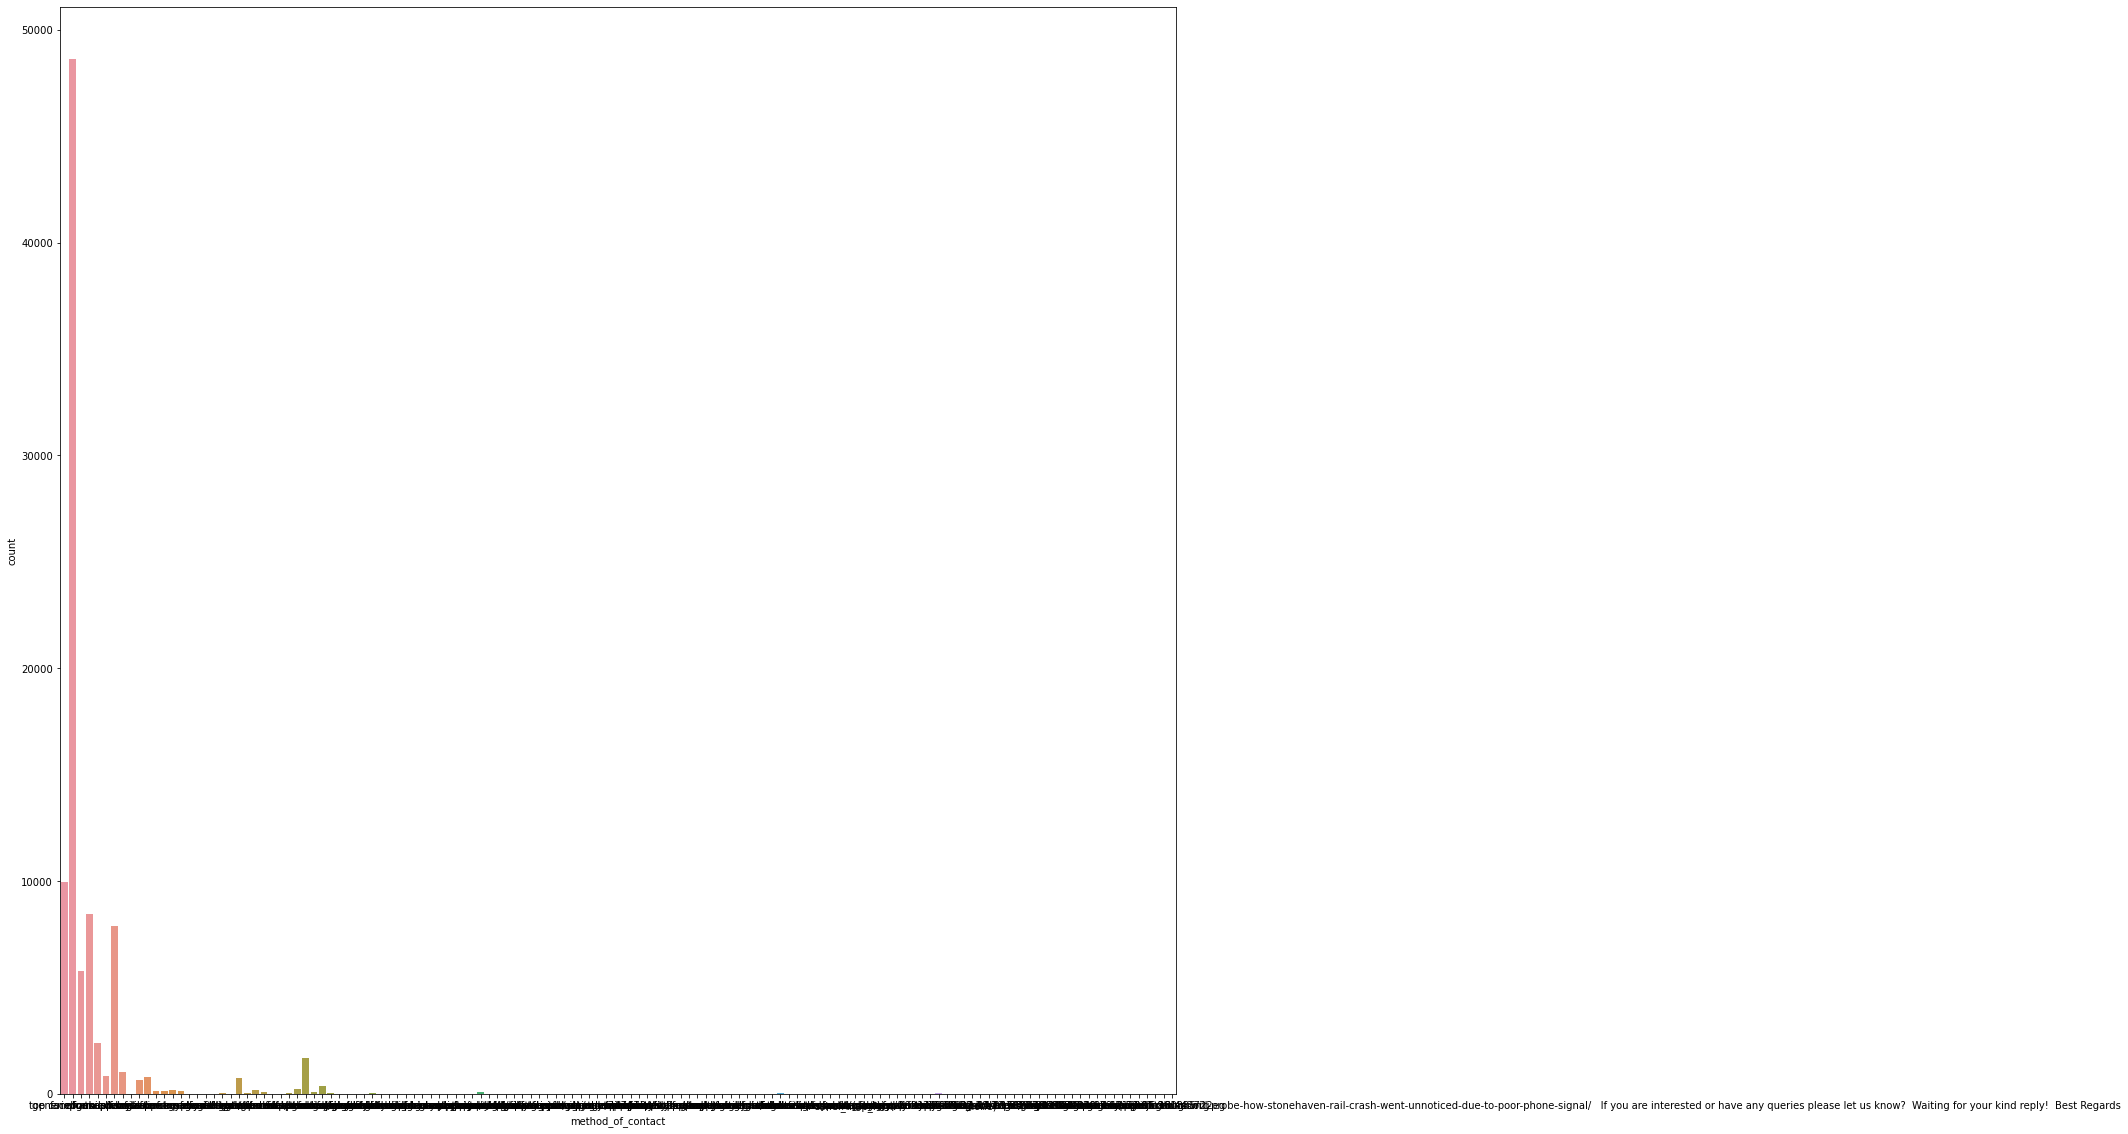

In [479]:
plt.figure(figsize=(20,20))
sns.countplot(x='method_of_contact',data=nawy_data)

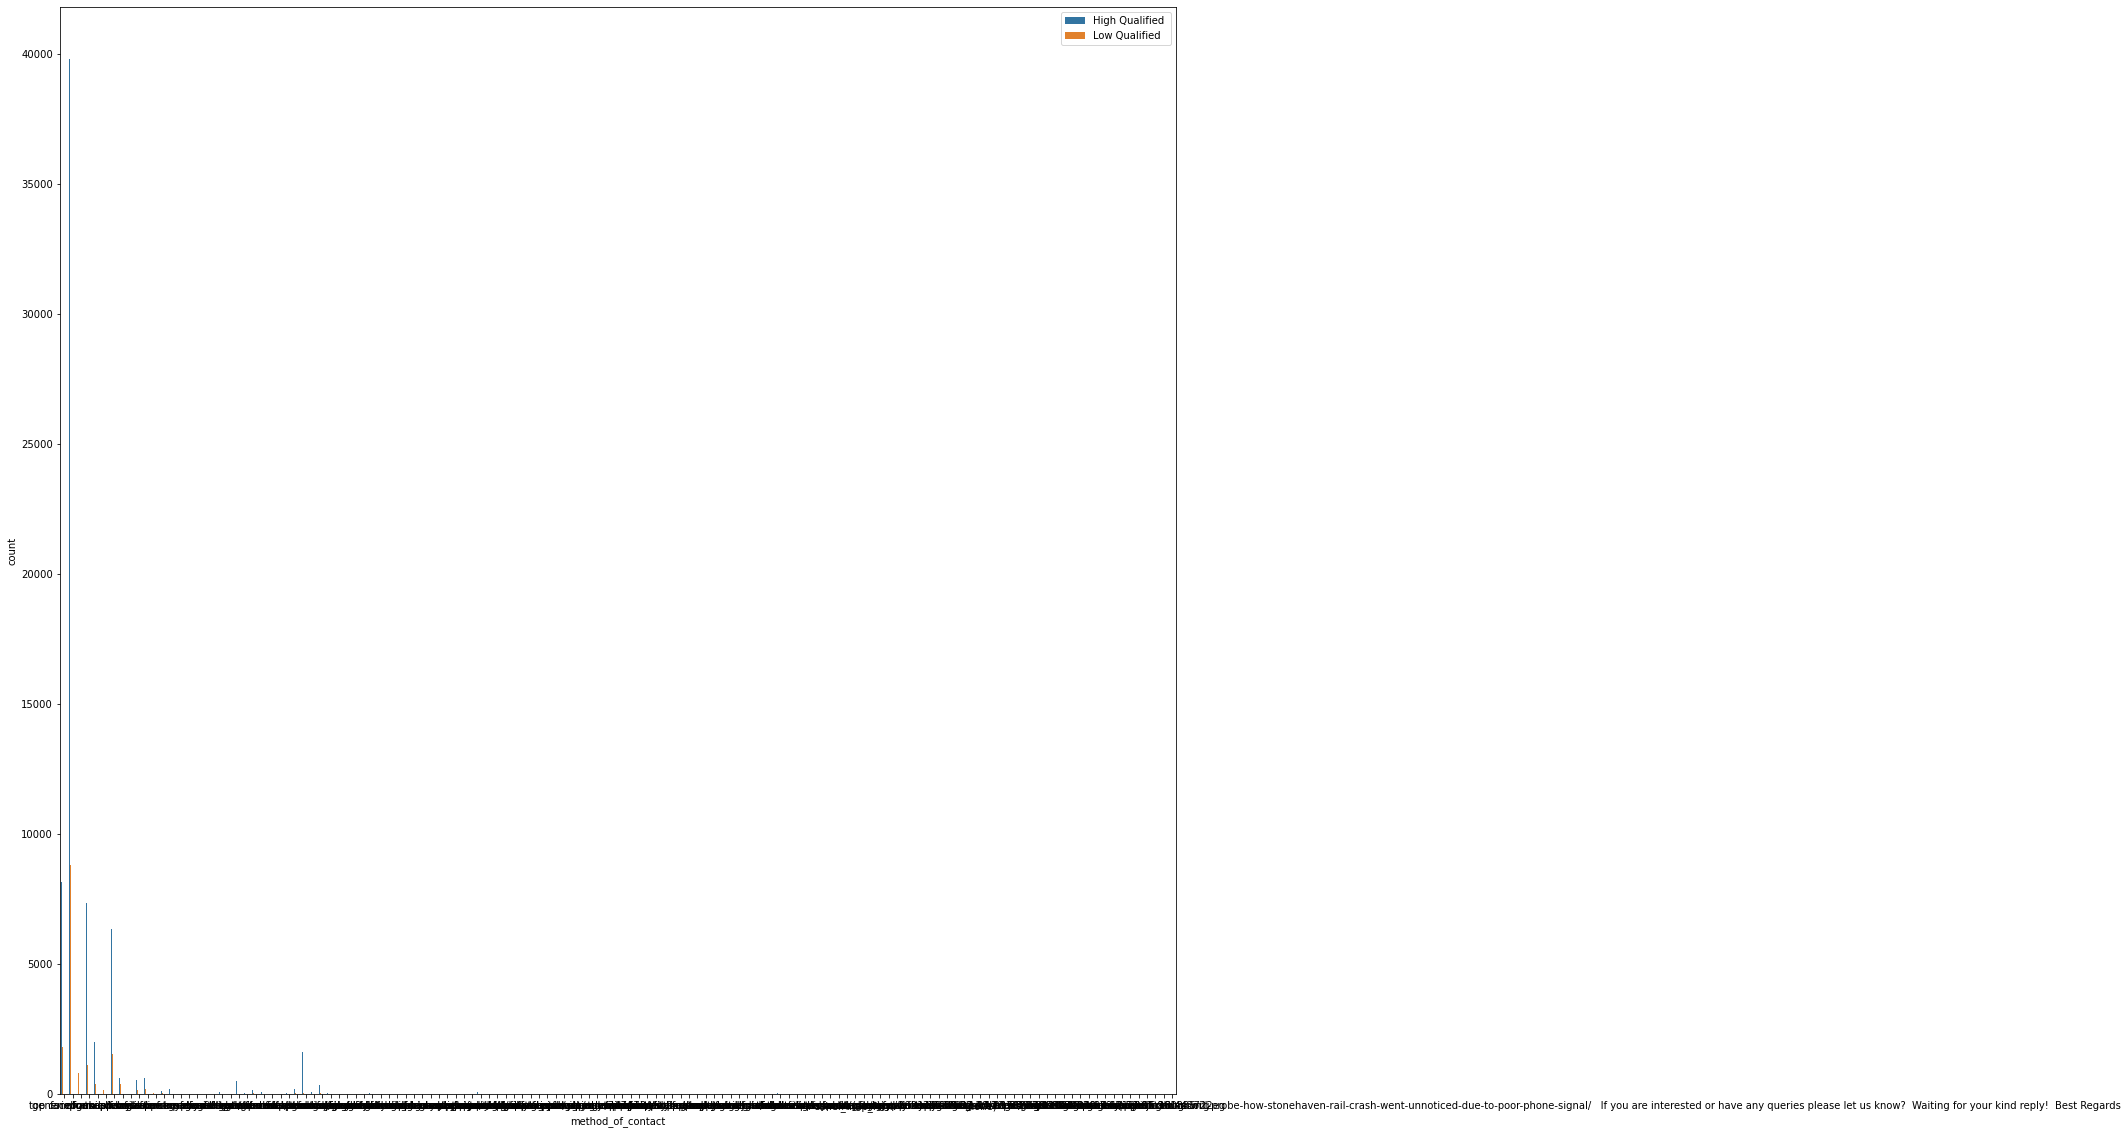

In [480]:
plt.figure(figsize=(20,20))
sns.countplot(x='method_of_contact',hue='low_qualified',data=nawy_data)
plt.legend(loc='upper right', labels=['High Qualified ', 'Low Qualified'])

In [481]:
# plt.figure(figsize=(20,20))
# sns.countplot(x='ad_group',data=nawy_data)
nawy_data.ad_group.value_counts()

none                                                                              39835
mountain view october - khaleeji lookalike 3%                                       995
mountain view october - general audience with investment/real estate interests      697
aura apartments - general audience real estate interests                            550
the lakes bloomfields - khaleeji lookalike                                          473
                                                                                  ...  
o west -  general audience with real estate interests                                 1
belle vie - 6th of october projects website visitors                                  1
kayan--perfect lookalike 3%                                                           1
zed east - qualified lookalike - new cairo                                            1
october plaza - general audience with new cairo interests                             1
Name: ad_group, Length: 2480, dt

In [482]:
nawy_data.lead_source.value_counts()

facebook             51267
google               18095
website               5184
phone                 2804
personal              1669
                     ...  
personal/ gena           1
google lead form         1
blogwritr.com            1
personal/referral        1
personal - amany         1
Name: lead_source, Length: 125, dtype: int64

In [483]:
nawy_data.campaign.value_counts()

none                                          21601
(none)                                         2784
google_cpc                                     2623
mountain view - lead generation - cooing 3     1586
emaar - lead generation - cooing 3             1431
                                              ...  
dev%20-%20al%20ahly%20for%20real%20estate         1
north_edge_custom_intent_english                  1
dev_-_verdura                                     1
al burouj misr - lead generation                  1
amrelsaied-3358                                   1
Name: campaign, Length: 761, dtype: int64

In [484]:
nawy_data.location.value_counts()

none                                12962
marassi                              3402
mountain view october apartments     2521
badya                                1836
palm hills new cairo                 1829
                                    ...  
wbr1  - new cairo                       1
il monte galala, ain sokhna             1
gouna/red sea                           1
al burouj duplex roof                   1
maesta il monte galala                  1
Name: location, Length: 3146, dtype: int64

In [485]:
len(nawy_data)-89313

1816

In [486]:
len(nawy_data[nawy_data['location'].map(nawy_data['location'].value_counts()) ==1])

1667

# check the distribution of the target variable 

In [487]:

nawy_data.low_qualified.value_counts()

0                             75136
1                             15985
none                              3
club residences                   1
ora                               1
mountain view ras el hekma        1
newshunt360.com                   1
address east                      1
Name: low_qualified, dtype: int64

In [559]:
nawy_data.low_qualified.value_counts()*100/len(nawy_data)

0                             82.450153
1                             17.541068
none                           0.003292
club residences                0.001097
ora                            0.001097
mountain view ras el hekma     0.001097
newshunt360.com                0.001097
address east                   0.001097
Name: low_qualified, dtype: float64

In [488]:
nawy_data[nawy_data.low_qualified=='club residences']

lead_id customer_name lead_mobile_network   message  \
41169    54265     آلاء خالد                   ?  Vodafone   

                                               lead_time  \
41169  ad_id : 23848437135960398 \nadgroup_id : 23848...   

                method_of_contact  ad_group  \
41169  2021-10-05 02:20:12.510749  facebook   

                                             lead_source  campaign  location  \
41169  club residences -  general audience with real ...  facebook  facebook   

         low_qualified  
41169  club residences

# Data preprocessing


In [489]:
nawy_copy=nawy_data.copy()


In [490]:
# keep only the top 5 frequent records and set the rest to other
top_methods=list(nawy_copy['method_of_contact'].value_counts().iloc[:5].index)
nawy_copy.loc[~nawy_copy['method_of_contact'].isin(top_methods),'method_of_contact']='other'
nawy_copy['method_of_contact'].value_counts()

facebook              48649
other                 10425
generic form           9966
whatsapp               8444
phone                  7877
top compounds form     5768
Name: method_of_contact, dtype: int64

In [491]:
# keep only the top 5 frequent records and set the rest to other
top_methods=list(nawy_copy['ad_group'].value_counts().iloc[:5].index)
nawy_copy.loc[~nawy_copy['ad_group'].isin(top_methods),'ad_group']='other'
nawy_copy['ad_group'].value_counts()


other                                                                             48579
none                                                                              39835
mountain view october - khaleeji lookalike 3%                                       995
mountain view october - general audience with investment/real estate interests      697
aura apartments - general audience real estate interests                            550
the lakes bloomfields - khaleeji lookalike                                          473
Name: ad_group, dtype: int64

In [492]:
# keep only the top 5 frequent records and set the rest to other
top_methods=list(nawy_copy['ad_group'].value_counts().iloc[:5].index)
nawy_copy.loc[~nawy_copy['ad_group'].isin(top_methods),'ad_group']='other'
nawy_copy['ad_group'].value_counts()


other                                                                             49052
none                                                                              39835
mountain view october - khaleeji lookalike 3%                                       995
mountain view october - general audience with investment/real estate interests      697
aura apartments - general audience real estate interests                            550
Name: ad_group, dtype: int64

In [493]:
# keep only the top 5 frequent records and set the rest to other
top_methods=list(nawy_copy['lead_source'].value_counts().iloc[:5].index)
nawy_copy.loc[~nawy_copy['lead_source'].isin(top_methods),'lead_source']='other'
nawy_copy['lead_source'].value_counts()

facebook    51267
google      18095
other       12110
website      5184
phone        2804
personal     1669
Name: lead_source, dtype: int64

In [494]:
# keep only the top 5 frequent records and set the rest to other
top_methods=list(nawy_copy['campaign'].value_counts().iloc[:5].index)
nawy_copy.loc[~nawy_copy['campaign'].isin(top_methods),'campaign']='other'
nawy_copy['campaign'].value_counts()

other                                         61104
none                                          21601
(none)                                         2784
google_cpc                                     2623
mountain view - lead generation - cooing 3     1586
emaar - lead generation - cooing 3             1431
Name: campaign, dtype: int64

In [495]:
#here for the campaing will set the (none) and noe values to be a single none
nawy_copy.loc[nawy_copy['campaign'].isin(["(none)"]),'campaign']='none'
nawy_copy['campaign'].value_counts()

other                                         61104
none                                          24385
google_cpc                                     2623
mountain view - lead generation - cooing 3     1586
emaar - lead generation - cooing 3             1431
Name: campaign, dtype: int64

In [496]:
# keep only the top 5 frequent records and set the rest to other
top_methods=list(nawy_copy['location'].value_counts().iloc[:5].index)
nawy_copy.loc[~nawy_copy['location'].isin(top_methods),'location']='other'
nawy_copy['location'].value_counts()

other                               68579
none                                12962
marassi                              3402
mountain view october apartments     2521
badya                                1836
palm hills new cairo                 1829
Name: location, dtype: int64

In [497]:
#Drop the irrelevant records of the mobile_network
nawy_copy.lead_mobile_network.value_counts()

Vodafone    39046
Orange      18071
Etisalat    16462
Gulf        12070
Others       2422
US_Canda     1149
Europe       1025
WE            881
?               1
hykjghk         1
Name: lead_mobile_network, dtype: int64

In [498]:
index_rows=nawy_copy[np.logical_or(nawy_copy['lead_mobile_network'] =='hykjghk',nawy_copy['lead_mobile_network'] =='?')].index
nawy_copy = nawy_copy.drop(index_rows, axis=0)

In [499]:
nawy_copy.lead_mobile_network.value_counts()

Vodafone    39046
Orange      18071
Etisalat    16462
Gulf        12070
Others       2422
US_Canda     1149
Europe       1025
WE            881
Name: lead_mobile_network, dtype: int64

In [500]:
#Select only rows with 0 or 1 as target

top_methods=list(nawy_copy['low_qualified'].value_counts().iloc[:2].index)
nawy_copy.loc[~nawy_copy['low_qualified'].isin(top_methods),'low_qualified']=None
nawy_copy['low_qualified'].dropna(inplace=True)
nawy_copy['low_qualified'].value_counts()

0    75136
1    15985
Name: low_qualified, dtype: int64

# Convert the lead time to datetime

In [ ]:
nawy_copy.copy()

In [511]:
nawy_copy['lead_time']=pd.to_datetime(nawy_copy['lead_time'])

In [512]:
nawy_copy['lead_time'].head()

0   2022-03-07 12:56:20.523509
1   2019-09-16 13:17:18.459000
2   2022-05-07 02:03:53.589687
3   2019-12-19 22:56:46.662000
4   2022-01-27 05:56:22.806753
Name: lead_time, dtype: datetime64[ns]

In [513]:
nawy_copy['contact_year']=nawy_copy['lead_time'].dt.year
nawy_copy['contact_month']=nawy_copy['lead_time'].dt.month
nawy_copy['contact_day']=nawy_copy['lead_time'].dt.day
nawy_copy['contact_weekday']=nawy_copy['lead_time'].dt.weekday

# Check the variation of low qualified with days,months and years 



<AxesSubplot:xlabel='contact_year', ylabel='low_qualified'>

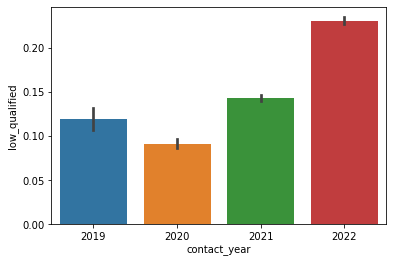

In [517]:
sns.barplot(x='contact_year',y='low_qualified',data=nawy_copy)

In [518]:
sns.lineplot(x='contact_month',y='low_qualified',data=nawy_copy)

<AxesSubplot:xlabel='contact_month', ylabel='low_qualified'>

In [519]:
sns.lineplot(x='contact_day',y='low_qualified',data=nawy_copy)

<AxesSubplot:xlabel='contact_day', ylabel='low_qualified'>

In [520]:
sns.lineplot(x='contact_weekday',y='low_qualified',data=nawy_copy)

<AxesSubplot:xlabel='contact_weekday', ylabel='low_qualified'>

# Encode the data 


In [501]:
# convert to categorical data
lead_cat = nawy_copy.lead_mobile_network.astype('category')
lead_cat_dic = dict(enumerate(lead_cat.cat.categories))
nawy_copy['lead_mobile_network'] =nawy_copy['lead_mobile_network'].astype('category').cat.codes

In [ ]:
lead_cat_dic

In [502]:
method_of_contact_cat = nawy_copy.method_of_contact.astype('category')
method_of_contact_dic = dict(enumerate(method_of_contact_cat.cat.categories))
nawy_copy['method_of_contact'] =nawy_copy['method_of_contact'].astype('category').cat.codes

method_of_contact_dic

{0: 'facebook',
 1: 'generic form',
 2: 'other',
 3: 'phone',
 4: 'top compounds form',
 5: 'whatsapp'}

In [503]:
lead_source_cat = nawy_copy.method_of_contact.astype('category')
lead_source_dic = dict(enumerate(method_of_contact_cat.cat.categories))
nawy_copy['lead_source'] =nawy_copy['lead_source'].astype('category').cat.codes

lead_source_dic

{0: 'facebook',
 1: 'generic form',
 2: 'other',
 3: 'phone',
 4: 'top compounds form',
 5: 'whatsapp'}

In [504]:
ad_group_cat = nawy_copy.ad_group.astype('category')
ad_group_dic = dict(enumerate(ad_group_cat.cat.categories))
nawy_copy['ad_group'] =nawy_copy['ad_group'].astype('category').cat.codes



In [505]:
location_cat = nawy_copy.location.astype('category')
location_dic = dict(enumerate(location_cat.cat.categories))
nawy_copy['location'] =nawy_copy['location'].astype('category').cat.codes
location_dic

{0: 'badya',
 1: 'marassi',
 2: 'mountain view october apartments',
 3: 'none',
 4: 'other',
 5: 'palm hills new cairo'}

In [506]:
nawy_copy.low_qualified.dropna(inplace=True)
low_qual_cat = nawy_copy.low_qualified.astype('category') # I tried using astype('int') directly but it showed error
low_qual_dic = dict(enumerate(low_qual_cat.cat.categories))
nawy_copy['low_qualified'] =nawy_copy['low_qualified'].astype('category').cat.codes


low_qual_dic

{0: '0', 1: '1'}

In [507]:
nawy_copy['low_qualified'] .value_counts()

 0    75136
 1    15985
-1        6
Name: low_qualified, dtype: int64

In [508]:
nawy_copy=nawy_copy[nawy_copy['low_qualified']!=-1]

In [509]:
nawy_copy['low_qualified'].value_counts()/nawy_copy['low_qualified'].count() #Approximately the 0 classs is about 80%

0    0.824574
1    0.175426
Name: low_qualified, dtype: float64

In [ ]:
# nawy_data.iloc[46959]

In [ ]:
# nawy_data['low_qualified'].value_counts()

In [514]:
nawy_copy['contact_year'].value_counts()

2022    40174
2021    38303
2020     9891
2019     2753
Name: contact_year, dtype: int64

In [515]:
nawy_copy['contact_month'].value_counts()

5     15443
4      9901
2      8976
3      8371
8      7857
7      6315
9      6272
12     6118
11     5927
10     5848
1      5823
6      4270
Name: contact_month, dtype: int64

In [516]:
nawy_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91121 entries, 0 to 91128
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   lead_id              91121 non-null  int64         
 1   customer_name        91121 non-null  object        
 2   lead_mobile_network  91121 non-null  int8          
 3   message              89083 non-null  object        
 4   lead_time            91121 non-null  datetime64[ns]
 5   method_of_contact    91121 non-null  int8          
 6   ad_group             91121 non-null  int8          
 7   lead_source          91121 non-null  int8          
 8   campaign             91121 non-null  object        
 9   location             91121 non-null  int8          
 10  low_qualified        91121 non-null  int8          
 11  contact_year         91121 non-null  int64         
 12  contact_month        91121 non-null  int64         
 13  contact_day          91121 non-

# Select trainning features 

In [522]:
select_features=nawy_copy.select_dtypes(['int64','int8'])
select_features.columns

X,y=select_features.drop('low_qualified',axis=1),select_features['low_qualified']

# Split the data to train and test

In [523]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

# Selecting a model to train 

In [524]:
#basline model
from sklearn.linear_model import LogisticRegression
clf_base=LogisticRegression()

clf_base.fit(X_train,y_train)
clf_base.score(X_test,y_test)

0.8245601199839045

In [525]:
#to focus on the fp problem
from sklearn.metrics import precision_score
y_pred=clf_base.predict(X_test)
precision_score(y_test, y_pred,zero_division=1,average=None)

array([0.82456012, 1.        ])

In [526]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     22541
           1       1.00      0.00      0.00      4796

    accuracy                           0.82     27337
   macro avg       0.91      0.50      0.45     27337
weighted avg       0.86      0.82      0.75     27337



C:\Users\Omar Wafaay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


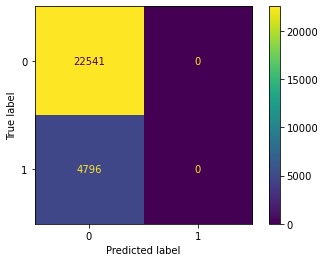

In [527]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_base, X_test, y_test)

In [528]:
y_train.value_counts()

0    52595
1    11189
Name: low_qualified, dtype: int64

In [529]:
y_test.value_counts()

0    22541
1     4796
Name: low_qualified, dtype: int64

In [530]:
pd.Series(y_pred).value_counts() #As we see here  the base line model classified all the instances as 0s 

0    27337
dtype: int64

In [531]:
from sklearn.metrics import PrecisionRecallDisplay,precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

# Trying Random forest model


In [560]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier()
clf_rf.fit(X_train,y_train)


RandomForestClassifier()

In [533]:
plot_confusion_matrix(clf_rf, X_test, y_test)

C:\Users\Omar Wafaay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


In [561]:
y_pred=clf_rf.predict(X_test)
precision_score(y_test, y_pred,zero_division=1,average=None)

array([0.86124038, 0.4098405 ])

In [562]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     22541
           1       0.41      0.32      0.36      4796

    accuracy                           0.80     27337
   macro avg       0.64      0.61      0.62     27337
weighted avg       0.78      0.80      0.79     27337



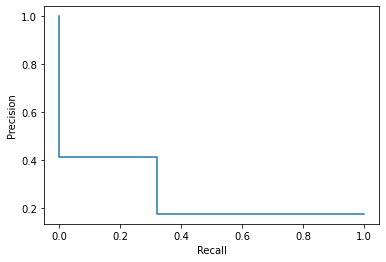

In [536]:
#test the percision recall curve for rf model
y_pred=clf_rf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

In [537]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     22541
           1       0.41      0.32      0.36      4796

    accuracy                           0.80     27337
   macro avg       0.64      0.61      0.62     27337
weighted avg       0.78      0.80      0.79     27337



In [538]:
precision_score(y_test, y_pred)  

0.4130962004850445

As we see in the confision matrix and the per rec curve here the fp is very high  this is mainly due to to the class imbalance!

# Handling imbalance in the trainning data

In [539]:
#Using random over sampler
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)


In [540]:
y_res.value_counts()

0    52595
1    52595
Name: low_qualified, dtype: int64

In [541]:
clf_rf=RandomForestClassifier()
clf_rf.fit(X_res,y_res)
y_pred=clf_rf.predict(X_test)

C:\Users\Omar Wafaay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


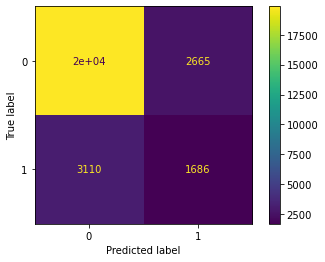

In [542]:
plot_confusion_matrix(clf_rf, X_test, y_test)

In [543]:
print(classification_report(y_test,y_pred,zero_division=1)) #Looks like our proplem is not solved

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     22541
           1       0.39      0.35      0.37      4796

    accuracy                           0.79     27337
   macro avg       0.63      0.62      0.62     27337
weighted avg       0.78      0.79      0.78     27337



In [544]:
#using SMOTE over_sampling
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=4)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [545]:
clf_rf.fit(X_res,y_res)
y_pred=clf_rf.predict(X_test)

C:\Users\Omar Wafaay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


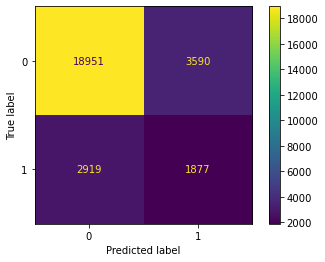

In [546]:
plot_confusion_matrix(clf_rf, X_test, y_test)

In [547]:
 print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     22541
           1       0.34      0.39      0.37      4796

    accuracy                           0.76     27337
   macro avg       0.60      0.62      0.61     27337
weighted avg       0.77      0.76      0.77     27337



In [548]:
#Random undersampling

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)


In [549]:
clf_rf.fit(X_res,y_res)
y_pred=clf_rf.predict(X_test)

In [550]:
 print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74     22541
           1       0.26      0.60      0.37      4796

    accuracy                           0.63     27337
   macro avg       0.57      0.62      0.56     27337
weighted avg       0.78      0.63      0.68     27337



In [551]:
from imblearn.under_sampling import NearMiss
under_sampler = NearMiss()
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
clf_rf.fit(X_res,y_res)
y_pred=clf_rf.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.87      0.47      0.61     22541
           1       0.21      0.68      0.33      4796

    accuracy                           0.51     27337
   macro avg       0.54      0.58      0.47     27337
weighted avg       0.76      0.51      0.56     27337



In [552]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np
def build_and_test(X_tr, X_te, y_tr, y_te, class_weight=None, threshold=False):
    
    # Build and Plot PCA
    pca = PCA(n_components=2)
    pca.fit(X_tr)
    X_pca = pca.transform(X_tr)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_tr, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()
    
    # Build and fit the model
    if class_weight:
        model = DecisionTreeClassifier(class_weight=class_weight)
    else:
        model = DecisionTreeClassifier()
    model.fit(X_tr, y_tr)
    
    # Test the model
    y_pred = model.predict(X_te)
    print('Precision score %s' % precision_score(y_te, y_pred))
    print('Recall score %s' % recall_score(y_te, y_pred))
    print('F1-score score %s' % f1_score(y_te, y_pred))
    print('Accuracy score %s' % accuracy_score(y_te, y_pred))
    
    y_score = model.predict_proba(X_te)
    fpr0, tpr0, thresholds = roc_curve(y_te, y_score[:, 1])
    roc_auc0 = auc(fpr0, tpr0)
    
    # Calculate the best threshold
    best_threshold = None
    if threshold:
        J = tpr0 - fpr0
        ix = np.argmax(J) # take the value which maximizes the J variable
        best_threshold = thresholds[ix]
        # adjust score according to threshold.
        y_score = np.array([[1, y[1]] if y[0] >= best_threshold else [0, y[1]] for y in y_score])
        
    
#     # Plot metrics 
#     plot_roc(y_te, y_score)
#     plt.show()
    
#     plot_precision_recall(y_te, y_score)
#     plt.show()
    
#     plot_cumulative_gain(y_te, y_score)
#     plt.show()
    
#     plot_lift_curve(y_te, y_score)
#     plt.show()
    
    # Print a classification report
    print(classification_report(y_te,y_pred))
    return roc_auc0,fpr0,tpr0, best_threshold

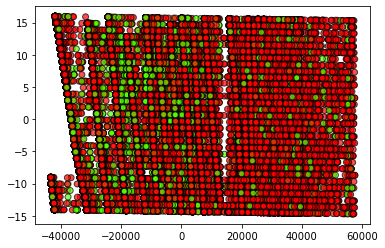

Precision score 0.38296178343949044
Recall score 0.4011676396997498
F1-score score 0.3918533604887984
Accuracy score 0.7815415005304166
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     22541
           1       0.38      0.40      0.39      4796

    accuracy                           0.78     27337
   macro avg       0.63      0.63      0.63     27337
weighted avg       0.79      0.78      0.78     27337

Best Treshold: 1.0


In [553]:
roc_auc_thr,fpr_thr,tpr_thr, threshold = build_and_test(X_train, X_test, y_train, y_test, threshold=True)
print(f"Best Treshold: {threshold}")

# Try Balanced RF classifier 

In [554]:
from imblearn.ensemble import BalancedRandomForestClassifier
clf_brf=BalancedRandomForestClassifier()
clf_brf.fit(X_train,y_train)


BalancedRandomForestClassifier()

In [555]:
y_pred=clf_rf.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.87      0.47      0.61     22541
           1       0.21      0.68      0.33      4796

    accuracy                           0.51     27337
   macro avg       0.54      0.58      0.47     27337
weighted avg       0.76      0.51      0.56     27337



In [556]:
#plt.figure(figsize=(10,10))
# sns.lineplot(x='lead_time',y='low_qualified',data=nawy_copy)